In [10]:
import numpy as np
import pandas as pd
from win32inet import SetUrlCacheGroupAttribute

X=pd.read_csv('tree_class_feats.csv')
y=pd.read_csv('tree_class_target.csv')

In [11]:
print(X.shape[0])
print(y.shape[0])
print(np.unique(y))

10000
10000
[0 1]


In [12]:
from keras.models import Sequential
from tensorflow import random
np.random.seed(42)
random.set_seed(42)
model=Sequential()

In [13]:
from keras.layers import Dense, Activation
model.add(Dense(10, activation='tanh', input_dim=10))

D:\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.add(Dense(5, activation='tanh'))

In [15]:
model.add(Dense(1, activation='sigmoid'))

In [16]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 171 (684.00 B)

 Trainable params: 171 (684.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
history=model.fit(X,y,epochs=100,batch_size=5,verbose=1,validation_split=0.2,shuffle=False)

Epoch 1/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8188 - loss: 0.4173 - val_accuracy: 0.8750 - val_loss: 0.3104
Epoch 2/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8589 - loss: 0.3269 - val_accuracy: 0.8860 - val_loss: 0.2825
Epoch 3/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8747 - loss: 0.2993 - val_accuracy: 0.8935 - val_loss: 0.2624
Epoch 4/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8855 - loss: 0.2751 - val_accuracy: 0.9070 - val_loss: 0.2438
Epoch 5/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9004 - loss: 0.2534 - val_accuracy: 0.9115 - val_loss: 0.2274
Epoch 6/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9071 - loss: 0.2355 - val_accuracy: 0.9125 - val_loss: 0.2161
Epoch 7/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9143 - loss: 0.2233 - val_accuracy: 0.9165 - val_loss: 0.2088
Epoch 8/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9169 - loss: 0

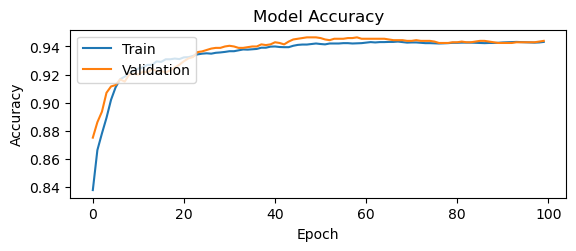

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'],loc='upper left')
plt.show()


In [21]:
y_predicted=model.predict(X.iloc[0:10,:])
print("Predicted probability for each of the "\
"examples belonging to class 1: "),print(y_predicted)
print("Predicted class label for each of the examples: "),
print(np.round(y_predicted))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Predicted probability for each of the examples belonging to class 1: 
[[0.00282162]
 [0.14117081]
 [0.00308369]
 [0.78951246]
 [0.94039124]
 [0.0029227 ]
 [0.78218955]
 [0.00411382]
 [0.00165187]
 [0.9951181 ]]
Predicted class label for each of the examples: 
[[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]]
